멜로디 예측을 위해 Keras를 사용하는 LSTM 네트워크

이 예제는 
Kushal Sharma 가 2018년 10월 23일 에 작성한
LSTM network using Keras for sequence prediction 을 참조하여 
https://medium.com/@kushal.sharma/lstm-network-using-keras-for-sequence-prediction-550b5bebae2c
작성한 것입니다.

케라스는 파이썬으로 작성된 오픈 소스 신경망 라이브러리입니다.
MXNet, Deeplearning4j, 텐서플로, Microsoft Cognitive Toolkit 또는 Theano 위에서 수행할 수 있습니다.

수학에서 수열(數列) 또는 열(列, sequence)은 수 또는 다른 대상의 순서 있는 나열입니다.
음악 역시 연속적인 숫자의 나열입니다.
미디(MIDI)데이터 역시 음의 높낮이를 숫자로 변형한 연속적인 숫자 입니다.

연속적인 숫자의 예측을 하기 위하여 Keras 를 이용한 LSTM 네트워크의 사용방법에 대하여 자세히 알고 싶다면 

https://keras.io/examples/

Keras코드 예제들을 살펴보시기 바랍니다.


장단기 메모리 Long Short-Term Memory (LSTM) 는 
순환 신경망 기법의 하나로 셀, 입력 게이트, 출력 게이트, 망각 게이트를 이용해 기존 순환 신경망의 문제인 기울기 소멸 문제를 방지하도록 개발되었습니다


LSTM 유닛으로 구성된 RNN은 종종 LSTM 네트워크라고 불립니다. 
공통 LSTM 유닛은 셀, 입력 게이트, 출력 게이트 및 잊기 게이트로 구성됩니다.
셀은 임의의 시간 간격에 걸쳐 값을 기억하고 세 개의 게이트는 셀 안팎으로 정보의 흐름을 조절합니다. 
LSTM 네트워크는 시계열의 중요한 이벤트 간에 알 수 없는 지속 시간의 지연이 있을 수 있으므로 시계열 데이터를 기반으로 분류, 처리 및 예측을 수행하는 데 매우 적합합니다.

In [8]:
import math
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

값 배열을 data_set 행렬로 변환 합니다.

In [2]:
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return numpy.array(data_x), numpy.array(data_y)

이 기본값은 X가 지정된 시간(t)의 항목 수량이고 Y는 다음 번에 항목의 수량(t + 1)인 데이터 세트를 만듭니다.
이제 data_set을 불러 옵니다.

In [10]:
data_frame = read_csv('onlynote.csv')
data_set = data_frame.values
data_set = data_set.astype('float32')

In [11]:
data_set 

array([[66.],
       [63.],
       [61.],
       [63.],
       [66.],
       [61.],
       [59.],
       [61.],
       [63.],
       [66.],
       [63.],
       [66.],
       [54.],
       [56.],
       [59.],
       [61.],
       [63.],
       [61.],
       [59.],
       [56.],
       [68.],
       [59.],
       [61.],
       [59.],
       [54.],
       [56.],
       [59.],
       [61.],
       [63.],
       [66.],
       [68.],
       [68.]], dtype=float32)

불러온 data_set 은  float 부동소수점 입니다.

data_set의 타입은 numpy.ndarray
입니다. 
넘파이 NumPy는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 파이썬의 라이브러리이입니다. NumPy는 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공합니다.
ndarray는 Numpy의 핵심인 다차원 행렬 자료구조 클래스 입니다. 

In [6]:
type(data_set)

numpy.ndarray

미디는 정수형을 사용합니다. 
그래서 Numpy float 부동소수점 을 int 정수형array 로 바꿔줍니다.

In [7]:
int_array = data_set.astype(int)

이제 정수 리스트를 볼수 있습니다.

In [9]:
int_array

array([[66],
       [63],
       [61],
       [63],
       [66],
       [61],
       [59],
       [61],
       [63],
       [66],
       [63],
       [66],
       [54],
       [56],
       [59],
       [61],
       [63],
       [61],
       [59],
       [56],
       [68],
       [59],
       [61],
       [59],
       [54],
       [56],
       [59],
       [61],
       [63],
       [66],
       [68],
       [68]])

불러온 data_set 을 그려봅니다.
나중에 악보와 한번 비교를 해보기 바랍니다.
악보의 선율 움직임이 그래프로 잘 나타나 있습니다.

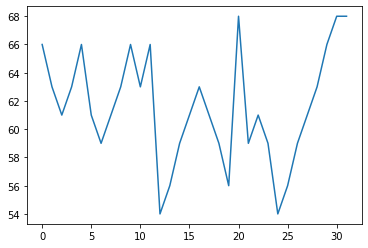

In [17]:
plt.plot(int_array)

이제 불러온 데이터를 악보로 그려봅니다. 위의 그래프와 선율의 움직임을 잘 비교해 보세요.
짬뽕 먹고 싶다는 사람 짜장면 사줘야 좋은소리 못듣습니다.
음악하는 사람은 백날 그래프 그려 보여줘 봐야. 악보 한번 그려주는것 보다 이해도가 떨어집니다.
우린 그냥 그런 사람들입니다. 자. MUSIC21을 사용해서 악보를 그려 봅니다.

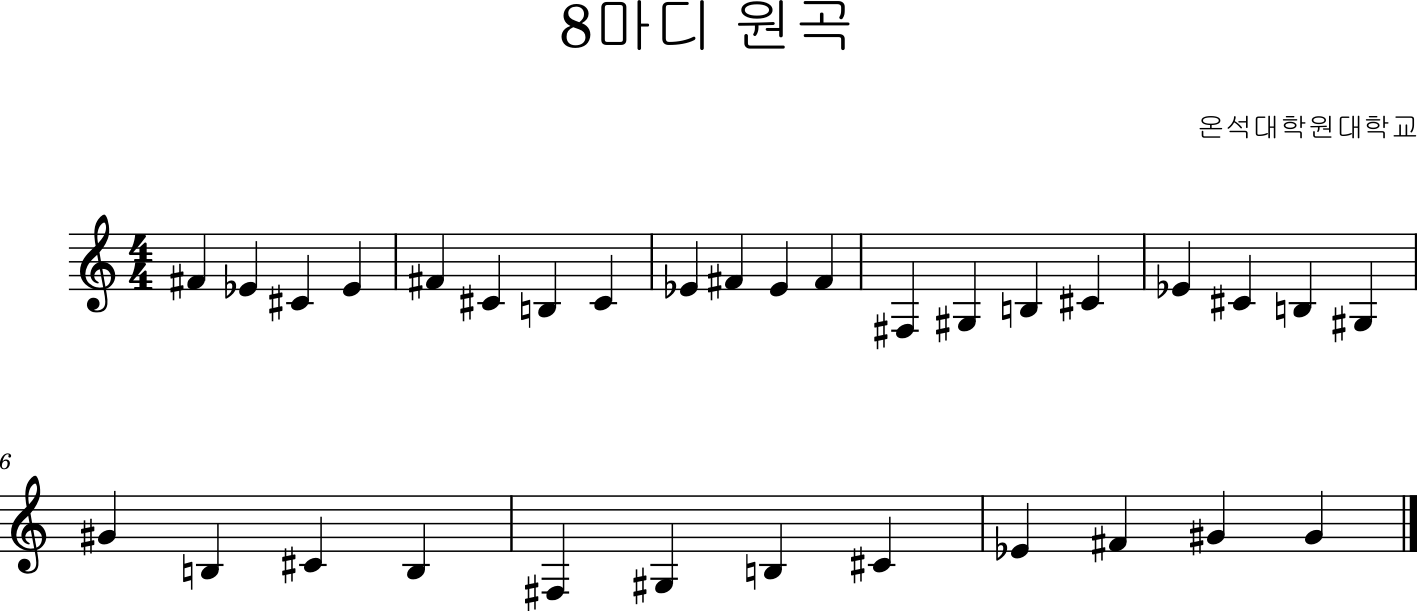

In [18]:
from music21 import *
s1 = stream.Stream();
s1.clear()

s1.insert(0, metadata.Metadata())
s1.metadata.title = '8마디 원곡 '
s1.metadata.composer = '온석대학원대학교'

for music in range(len(int_array)):
    n1 = note.Note(int(int_array[music]))
    n1.quarterLength=1
    s1.append(n1)      
s1.show()

들어봅니다.

In [41]:
s1.show("midi")

In [19]:
len(int_array)

32

변수의 길이 Length 를 알아보는 len(int_array) 를 사용하여 보니 불러온 데이터는 총 32개 였습니다. 
4분음표 32개면 총 8마디가 나옵니다. 그래서 원곡의 길이는 8마디 입니다.


LSTM은 입력 데이터의 스케일, 특히 시그모이드 또는 tanh 활성화 기능이 사용되는 경우에 민감합니다. 데이터의 크기를 0 대 1 범위로 다시 조정합니다. 이를 정규화라고도 합니다. scikit-learn 라이브러리의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 정규화합니다.

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_set = scaler.fit_transform(data_set)

데이터를 모델링하고 학습 데이터 세트에서 모델의 정확도를 추정한 후에는 보이지 않는 새로운 데이터에 대한 모델의 기술에 대한 아이디어를 얻어야 합니다. 정상적인 분류 또는 회귀 문제의 경우 교차 유효성 검사를 사용하여이 작업을 수행합니다. 시계열 데이터를 사용하면 값의 순서가 중요합니다. 우리가 사용한 간단한 방법은 정렬 된 데이터 세트를 학습 및 테스트 데이터 세트로 분할하는 것입니다. 아래 코드는 분할 지점의 인덱스를 계산하고 모델을 학습하는 데 사용할 수 있는 관측치의 67%를 사용하여 데이터를 학습 데이터 세트로 분리하고 나머지 33%는 모델 테스트에 남겨 둡니다.


불러들어온 data_set을 학습(train)용과 테스트(test)용으로 나눕니다.
32마디중 학습(train)용 데이터는 67% 입니다. 0.67을 곱한것이 보이나요?
test용 데이터는 data_set의 길이 len(data_set) 에서 train_size 를 뺍니다.
그럼 test용 데이터는 33% 입니다.

In [22]:
train_size = int(len(data_set) * 0.67)
test_size = len(data_set) - train_size
train, test = data_set[0:train_size, :], data_set[train_size:len(data_set), :]

LSTM 네트워크는 입력 데이터(X)가 [샘플, 시간 단계, 특징]의 형태로 특정 어레이 구조를 제공할 것으로 기대한다. 현재 우리의 데이터는 [샘플, 기능] 형식으로되어 있으며 각 샘플에 대해 한 번에 문제를 구성하고 있습니다. 우리는 numpy.reshape ()을 사용하여 준비된 기차 및 테스트 입력 데이터를 예상 구조로 변환 할 수 있습니다.

 X=t 그리고 Y=t+1 를 [samples, time steps, features] 로 변환 합니다.

In [23]:
look_back = 1
train_x, train_y = create_data_set(train, look_back)
test_x, test_y = create_data_set(test, look_back)

train_x = numpy.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = numpy.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

이제 LSTM 네트워크를 구축합니다. 네트워크에는 하나의 입력이있는 가시적 인 레이어, 네 개의 LSTM 블록 또는 뉴런이있는 하나의 숨겨진 레이어 및 단일 값 예측을 수행하는 출력 레이어가 있습니다.

LSTM 네트워크 모델 생성 및 맞추기 = Sequential() 를 합니다.

In [24]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
19/19 - 1s - loss: 0.4487 - 690ms/epoch - 36ms/step
Epoch 2/100
19/19 - 0s - loss: 0.4025 - 20ms/epoch - 1ms/step
Epoch 3/100
19/19 - 0s - loss: 0.3621 - 13ms/epoch - 682us/step
Epoch 4/100
19/19 - 0s - loss: 0.3247 - 13ms/epoch - 682us/step
Epoch 5/100
19/19 - 0s - loss: 0.2910 - 13ms/epoch - 682us/step
Epoch 6/100
19/19 - 0s - loss: 0.2622 - 13ms/epoch - 682us/step
Epoch 7/100
19/19 - 0s - loss: 0.2342 - 14ms/epoch - 734us/step
Epoch 8/100
19/19 - 0s - loss: 0.2105 - 14ms/epoch - 734us/step
Epoch 9/100
19/19 - 0s - loss: 0.1866 - 14ms/epoch - 734us/step
Epoch 10/100
19/19 - 0s - loss: 0.1671 - 13ms/epoch - 682us/step
Epoch 11/100
19/19 - 0s - loss: 0.1490 - 13ms/epoch - 682us/step
Epoch 12/100
19/19 - 0s - loss: 0.1308 - 13ms/epoch - 682us/step
Epoch 13/100
19/19 - 0s - loss: 0.1173 - 14ms/epoch - 734us/step
Epoch 14/100
19/19 - 0s - loss: 0.1040 - 13ms/epoch - 682us/step
Epoch 15/100
19/19 - 0s - loss: 0.0931 - 13ms/epoch - 682us/step
Epoch 16/100
19/19 - 0s - loss: 0.08

한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태입니다

epochs = 100 이라면 전체 데이터를 100번 사용해서 학습을 거치는 것입니다.

예측모델을 만듭니다. 모델이 적합하면 학습 및 테스트 데이터 세트에서 모델의 성능을 추정할 수 있습니다.

In [26]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

오류 점수를 계산하기 전에 예측을 반전하여 성능이 원래 데이터와 동일한 단위로 보고되도록 합니다.

In [27]:
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

평균 제곱근 오차 계산 을 합니다

In [28]:
train_score = math.sqrt(mean_squared_error(train_y[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % test_score)

Train Score: 3.15 RMSE
Test Score: 3.80 RMSE


데이터 세트가 준비된 방식 때문에 예측이 x축에 원래 데이터 세트와 정렬되도록 예측을 이동합니다.

In [20]:
train_predict_plot = numpy.empty_like(data_set)
train_predict_plot[:, :] = numpy.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

In [24]:
# shift test predictions for plotting
test_predict_plot = numpy.empty_like(data_set)
test_predict_plot[:, :] = numpy.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(data_set) - 1, :] = test_predict


In [29]:
# shift test predictions for plotting 
test_predict_plot = numpy.empty_like(data_set) 
test_predict_plot[:, :] = numpy.nan 
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(data_set) - 1, :] = test_predict

자 다 되었습니다.
이해를 다 못해도 상관없습니다. 우리는 이 프로그램을 가져다 사용할줄만 알면 됩니다.
우리가 언제 로직, 큐베이스의 내부구조를 다 알았나요? 우리는 기술을 활용하여 좋은 음악을 만들면 되는겁니다.

준비가 완료되면 원래 데이터 세트를 파란색으로, 
학습 데이터 세트에 대한 예측을 주황색으로 표시하고, 
보이지 않는 테스트 데이터 세트에 대한 예측을 녹색으로 표시하는 데이터를 플로팅합니다.

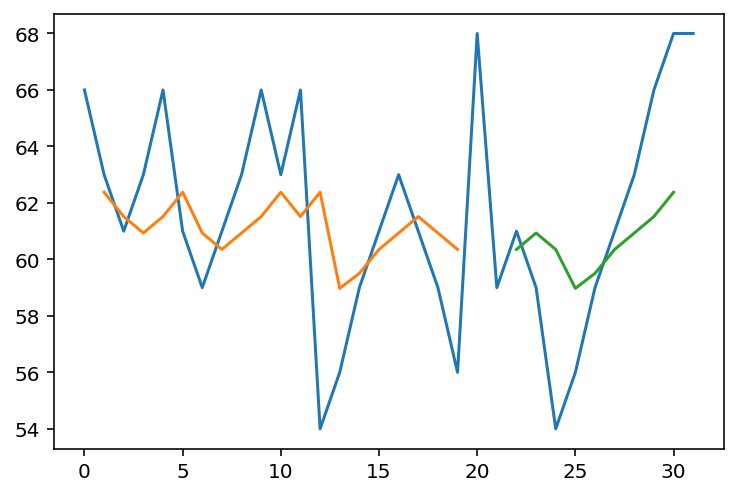

In [27]:
plt.plot(scaler.inverse_transform(data_set)) 
plt.plot(train_predict_plot) 
plt.plot(test_predict_plot) 
plt.show() 

그런데 우리가 원하는것은 처음부터 67% 까지는 원곡
나머지 33%. 즉 68%~ 100% 는 처음부터 67% 까지를 바탕으로 예측한 데이터를 보고 싶습니다.
그래서

베이스라인 및 예측 그래프만 따로 뗴어 그려냅니다.

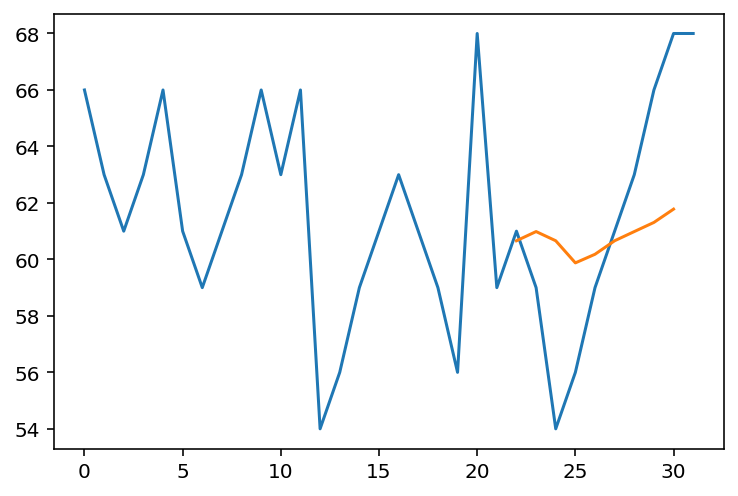

In [32]:
plt.plot(scaler.inverse_transform(data_set)) 
plt.plot(test_predict_plot) 
plt.show() 

나머지 33%. 즉 68%~ 100% 는 처음부터 67% 까지를 바탕으로 예측한 데이터 는 다음과 같습니다

In [33]:
test_predict_plot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [60.66025 ],
       [60.985607],
       [60.66025 ],
       [59.876923],
       [60.18169 ],
       [60.66025 ],
       [60.985607],
       [61.3094  ],
       [61.780277],
       [      nan]], dtype=float32)

Python에서 NumPy NAN은 숫자가 아니며 NumPy가 Python에서 배열을 처리하는 데 사용됩니다.
numpy를 사용하여 초기화될 수 있으므로 배열에서 누락된 값인 숫자 값을 선언하는 대신 정의됩니다.

이 말은 곡의 처음부터 67% 까지는 예측을 하지 않았으므로 nan 이라고 표시되고
나머지 33%부분은 숫자가 표시 된 겁니다.
test_predict_plot 의 숫자 형식은 numpy.ndarray 입니다.
이것을 MUSIC21에서 사용할 수 있게 일반 정수형의 리스트로 바꿉니다.

In [35]:
type(test_predict_plot)

numpy.ndarray

Numpy float를 int 배열로 변환

In [36]:
int_array = test_predict_plot.astype(int)

test_predict_plot.csv 파일로 예측된 값을 저장합니다.
csv는 엑셀이나 메모장에서 열수 있는 파일입니다.

In [37]:
numpy.savetxt("test_predict_plot.csv", test_predict_plot, delimiter=",")


이제 끝입니다.
MUSIC21을 사용하여 test_predict_plot 값을 악보로 만듭니다

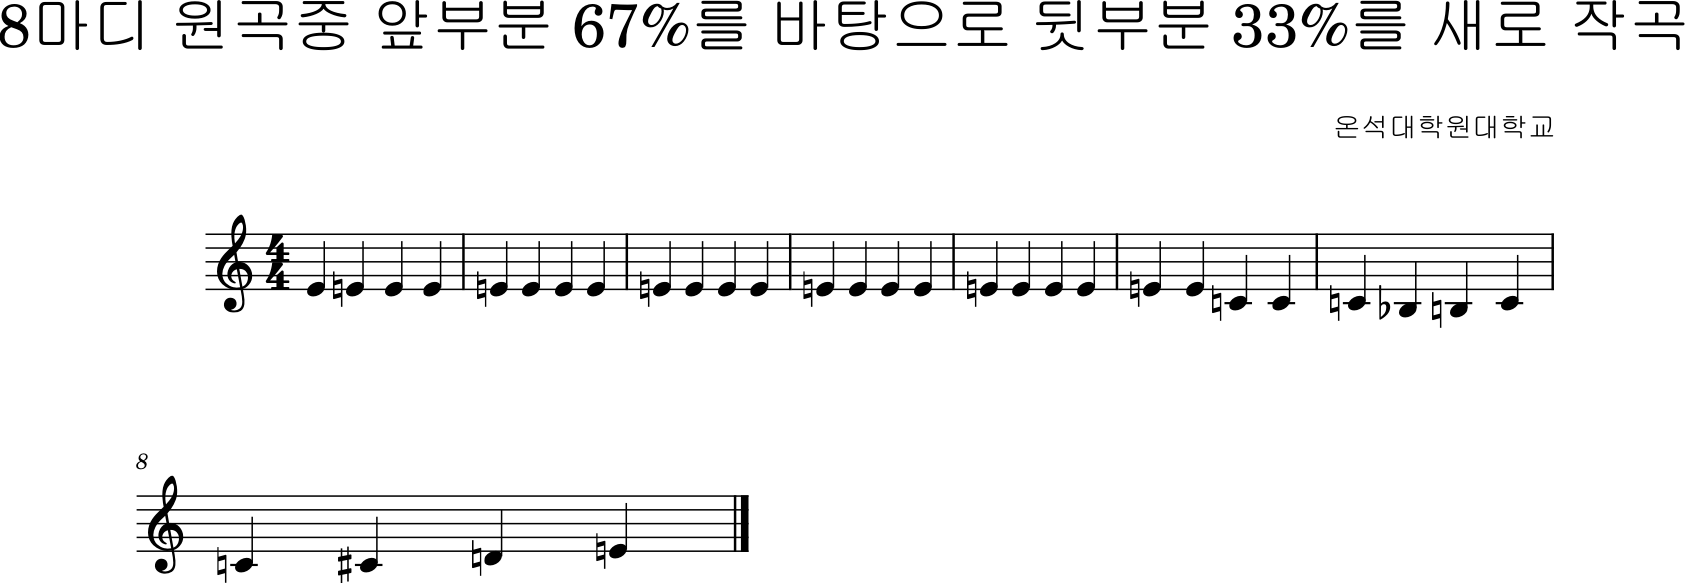

In [41]:
from music21 import *
s1 = stream.Stream();
s1.clear()

s1.insert(0, metadata.Metadata())
s1.metadata.title = '8마디 원곡중 앞부분 67%를 바탕으로 뒷부분 33%를 새로 작곡 '
s1.metadata.composer = '온석대학원대학교'

for music in range(len(int_array)):
    n1 = note.Note(int(int_array[music]))
    n1.quarterLength=1
    s1.append(n1)      
s1.show()

그런데 앞의 다섯마디는 nan 이므로 필요가 없습니다.
그래서 우리는 뒷부분만 다시 악보를 그려봅니다

for music in range(int(len(int_array)*0.68),len(int_array)):


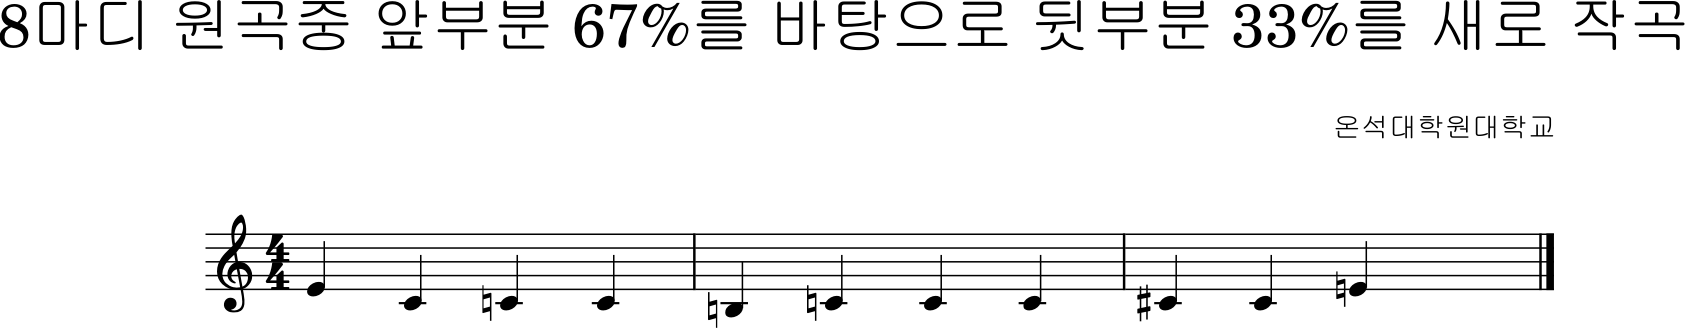

In [43]:
from music21 import *
s1 = stream.Stream();
s1.clear()

s1.insert(0, metadata.Metadata())
s1.metadata.title = '8마디 원곡중 앞부분 67%를 바탕으로 뒷부분 33%를 새로 작곡 '
s1.metadata.composer = '온석대학원대학교'

for music in range(int(len(int_array)*0.68),len(int_array)):
    n1 = note.Note(int(int_array[music]))
    n1.quarterLength=1
    s1.append(n1)      
s1.show()

In [44]:
s1.show("midi")